In [1]:
import pandas as pd
lines = pd.read_csv('kor.txt',names=['src','tar','etc'],sep='\t')
len(lines)

3621

In [2]:
lines.sample(10)

,src,tar,etc
3549,"Tom isn't a lazy boy. As a matter of fact, he ...",톰은 게으른 아이가 아니야. 실제로는 열심히 해.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
463,Tom flinched.,톰이 움찔했어.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1609,Wait for us in the lobby.,로비에서 기다려 주세요.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2217,I've never tried water skiing.,나는 한 번도 수상 스키를 타본 적이 없어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
3238,"By the way, have you ever been to Hokkaido?","그나저나, 너 홋카이도에 가본 적 있어?",CC-BY 2.0 (France) Attribution: tatoeba.org #3...
3114,My father set the alarm for six o'clock.,우리 아빠는 알람을 일곱 시로 맞췄어.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
3222,Tom didn't know who was going to be there.,톰은 누가 거기에 있을 건지 몰랐어.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
247,Keep quiet.,조용히 해.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1754,Are you a Canadian citizen?,당신은 캐나다 시민입니까?,CC-BY 2.0 (France) Attribution: tatoeba.org #4...
1812,Mary died of breast cancer.,메리는 유방암으로 죽었어.,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [3]:
lines.tar = lines.tar.apply(lambda x: '\t ' + x + ' \n')
lines.sample(10)

,src,tar,etc
3459,It's difficult for me to express myself in Fre...,\t 프랑스어로 자기소개를 하는 것은 내게 어려운 일이다. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
1306,I know Tom is autistic.,\t 난 톰이 자폐증이란 걸 알고 있어. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #7...
1311,I thought I dreamed it.,\t 내가 꿈꾼다고 생각했어. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2419,I thought that Tom was a doctor.,\t 톰이 의사인 줄 았았다. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #7...
660,I'm not sulking.,\t 나 삐친 거 아니야. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
2571,Tom is the fattest person I know.,\t 톰은 내가 알고 있는 선에서 가장 뚱뚱한 사람이야. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
1081,I no longer like you.,\t 나는 너를 더이상 좋아하지 않아 \n,CC-BY 2.0 (France) Attribution: tatoeba.org #1...
2625,"I was late, so I missed my flight.",\t 내가 늦어서 비행기를 놓쳤어. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #8...
2808,I thought that Tom didn't like cats.,\t 난 톰이 고양이를 싫어하는 줄 알았어. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #7...
411,I understand.,\t 이해해. \n,CC-BY 2.0 (France) Attribution: tatoeba.org #4...


In [0]:
## 글자 집합 구축
src_vocab = set()
for line in lines.src:
    for char in line:
        src_vocab.add(char)

tar_vocab=set()
for line in lines.tar:
    for char in line:
        tar_vocab.add(char)

In [5]:
src_vocab_size = len(src_vocab) + 1
tar_vocab_size = len(tar_vocab) + 1
print(src_vocab_size)
print(tar_vocab_size)

76
911


In [6]:
src_vocab = sorted(list(src_vocab))
tar_vocab = sorted(list(tar_vocab))
print(src_vocab[45:75])
print(tar_vocab[45:75])

['Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '°', 'ï', 'а']
['간', '갇', '갈', '감', '갑', '값', '갔', '강', '갖', '같', '개', '객', '갰', '걀', '걔', '거', '걱', '건', '걷', '걸', '검', '겁', '것', '게', '겐', '겠', '겨', '격', '겪', '견']


In [7]:
src_to_index = dict([(word, i+1) for i, word in enumerate(src_vocab)])
tar_to_index = dict([(word, i+1) for i, word in enumerate(tar_vocab)])
print(src_to_index)
print(tar_to_index)

{' ': 1, '!': 2, '"': 3, '$': 4, '%': 5, "'": 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '4': 14, '5': 15, '6': 16, '7': 17, '8': 18, '9': 19, ':': 20, ';': 21, '?': 22, 'A': 23, 'B': 24, 'C': 25, 'D': 26, 'E': 27, 'F': 28, 'G': 29, 'H': 30, 'I': 31, 'J': 32, 'K': 33, 'L': 34, 'M': 35, 'N': 36, 'O': 37, 'P': 38, 'Q': 39, 'R': 40, 'S': 41, 'T': 42, 'U': 43, 'V': 44, 'W': 45, 'Y': 46, 'a': 47, 'b': 48, 'c': 49, 'd': 50, 'e': 51, 'f': 52, 'g': 53, 'h': 54, 'i': 55, 'j': 56, 'k': 57, 'l': 58, 'm': 59, 'n': 60, 'o': 61, 'p': 62, 'q': 63, 'r': 64, 's': 65, 't': 66, 'u': 67, 'v': 68, 'w': 69, 'x': 70, 'y': 71, 'z': 72, '°': 73, 'ï': 74, 'а': 75}
{'\t': 1, '\n': 2, ' ': 3, '!': 4, '"': 5, '%': 6, '(': 7, ')': 8, ',': 9, '-': 10, '.': 11, '/': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '7': 20, '8': 21, '9': 22, ':': 23, '?': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'H': 29, 'M': 30, 'N': 31, 'T': 32, 'a': 33, 'd': 34, 'h': 35, 'i': 36, 'm': 37, 'o': 3

In [8]:
encoder_input = []
for line in lines.src:
    temp_X = []
    for w in line:
        temp_X.append(src_to_index[w])
    encoder_input.append(temp_X)
print(encoder_input[:5])

[[29, 61, 9], [30, 55, 9], [40, 67, 60, 2], [40, 67, 60, 9], [45, 54, 61, 22]]


In [9]:
 decoder_input = []
 for line in lines.tar:
     temp_X =[]
     for w in line:
         temp_X.append(tar_to_index[w])
     decoder_input.append(temp_X)
print(decoder_input)

[[1, 3, 44, 11, 3, 2], [1, 3, 548, 195, 11, 3, 2], [1, 3, 288, 570, 4, 3, 2], [1, 3, 288, 570, 11, 3, 2], [1, 3, 206, 96, 24, 3, 2], [1, 3, 612, 603, 4, 3, 2], [1, 3, 536, 4, 3, 2], [1, 3, 243, 603, 686, 4, 3, 2], [1, 3, 662, 843, 4, 3, 2], [1, 3, 662, 843, 857, 11, 3, 2], [1, 3, 117, 223, 319, 4, 3, 2], [1, 3, 650, 123, 4, 3, 2], [1, 3, 117, 223, 319, 11, 3, 2], [1, 3, 519, 646, 857, 11, 3, 2], [1, 3, 548, 195, 4, 3, 2], [1, 3, 551, 556, 570, 11, 3, 2], [1, 3, 519, 243, 857, 432, 69, 11, 3, 2], [1, 3, 174, 44, 3, 635, 77, 570, 4, 3, 2], [1, 3, 546, 220, 3, 635, 309, 4, 3, 2], [1, 3, 696, 664, 857, 11, 3, 2], [1, 3, 536, 4, 3, 2], [1, 3, 616, 570, 11, 3, 2], [1, 3, 88, 73, 4, 3, 2], [1, 3, 88, 73, 857, 4, 3, 2], [1, 3, 138, 702, 349, 4, 3, 2], [1, 3, 638, 570, 162, 11, 3, 2], [1, 3, 551, 71, 570, 4, 3, 2], [1, 3, 548, 546, 686, 11, 3, 2], [1, 3, 551, 546, 11, 3, 2], [1, 3, 162, 3, 638, 857, 11, 3, 2], [1, 3, 267, 570, 11, 3, 2], [1, 3, 660, 233, 3, 546, 220, 563, 11, 3, 2], [1, 3, 109,

In [10]:
decoder_target = []
for line in lines.tar:
    t = 0
    temp_X = []
    for w in line:
        if t>0:
            temp_X.append(tar_to_index[w])
        t += 1
    decoder_target.append(temp_X)
print(decoder_target)

[[3, 44, 11, 3, 2], [3, 548, 195, 11, 3, 2], [3, 288, 570, 4, 3, 2], [3, 288, 570, 11, 3, 2], [3, 206, 96, 24, 3, 2], [3, 612, 603, 4, 3, 2], [3, 536, 4, 3, 2], [3, 243, 603, 686, 4, 3, 2], [3, 662, 843, 4, 3, 2], [3, 662, 843, 857, 11, 3, 2], [3, 117, 223, 319, 4, 3, 2], [3, 650, 123, 4, 3, 2], [3, 117, 223, 319, 11, 3, 2], [3, 519, 646, 857, 11, 3, 2], [3, 548, 195, 4, 3, 2], [3, 551, 556, 570, 11, 3, 2], [3, 519, 243, 857, 432, 69, 11, 3, 2], [3, 174, 44, 3, 635, 77, 570, 4, 3, 2], [3, 546, 220, 3, 635, 309, 4, 3, 2], [3, 696, 664, 857, 11, 3, 2], [3, 536, 4, 3, 2], [3, 616, 570, 11, 3, 2], [3, 88, 73, 4, 3, 2], [3, 88, 73, 857, 4, 3, 2], [3, 138, 702, 349, 4, 3, 2], [3, 638, 570, 162, 11, 3, 2], [3, 551, 71, 570, 4, 3, 2], [3, 548, 546, 686, 11, 3, 2], [3, 551, 546, 11, 3, 2], [3, 162, 3, 638, 857, 11, 3, 2], [3, 267, 570, 11, 3, 2], [3, 660, 233, 3, 546, 220, 563, 11, 3, 2], [3, 109, 310, 344, 44, 4, 3, 2], [3, 80, 349, 617, 11, 3, 2], [3, 612, 344, 215, 3, 519, 243, 853, 61, 563,

In [11]:
max_src_len = max([len(line) for line in lines.src])
max_tar_len = max([len(line) for line in lines.tar])
print(max_src_len)
print(max_tar_len)

537
300


In [12]:
from keras.preprocessing.sequence import pad_sequences

encoder_input = pad_sequences(encoder_input, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen=max_tar_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen=max_tar_len, padding='post')

Using TensorFlow backend.


In [0]:
from keras.utils import to_categorical

encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)

In [0]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model

encoder_inputs = Input(shape=(None, src_vocab_size))
encoder_lstm = LSTM(units=256, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
encoder_states = [state_h, state_c]

In [15]:
decoder_inputs = Input(shape=(None, tar_vocab_size))
decoder_lstm = LSTM(units=256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_softmax_layer = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 76)     0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 911)    0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 256), (None, 340992      input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 256),  1196032     input_2[0][0]                    
                                                                 lstm_1[0][1]               

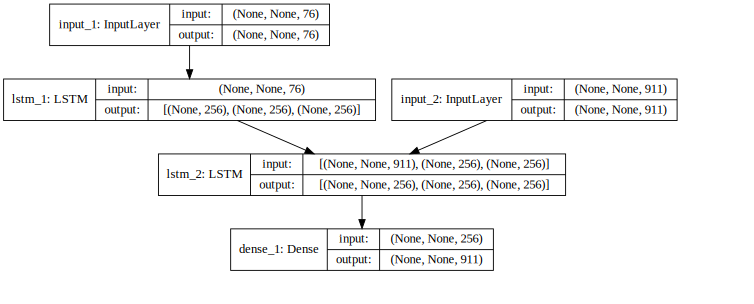

In [16]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [18]:
model.fit(x=[encoder_input, decoder_input], y=decoder_target, batch_size=64, epochs=50, validation_split=.2, callbacks=[es])

Train on 2896 samples, validate on 725 samples
Epoch 1/50
2896/2896 [==============================] - 179s 62ms/step - loss: 0.6489 - acc: 0.9340 - val_loss: 0.4717 - val_acc: 0.9264
Epoch 2/50
2896/2896 [==============================] - 179s 62ms/step - loss: 0.2422 - acc: 0.9562 - val_loss: 0.4480 - val_acc: 0.9300
Epoch 3/50
2896/2896 [==============================] - 178s 62ms/step - loss: 0.2323 - acc: 0.9570 - val_loss: 0.5172 - val_acc: 0.9258
Epoch 4/50
2896/2896 [==============================] - 177s 61ms/step - loss: 0.2192 - acc: 0.9591 - val_loss: 0.3962 - val_acc: 0.9351
Epoch 5/50
2896/2896 [==============================] - 178s 61ms/step - loss: 0.2030 - acc: 0.9628 - val_loss: 0.3649 - val_acc: 0.9397
Epoch 6/50
2896/2896 [==============================] - 177s 61ms/step - loss: 0.1876 - acc: 0.9668 - val_loss: 0.4560 - val_acc: 0.9334
Epoch 7/50
2896/2896 [==============================] - 178s 61ms/step - loss: 0.1749 - acc: 0.9689 - val_loss: 0.3474 - val_acc: 0

In [0]:
encoder_model = Model(inputs=encoder_inputs, outputs=encoder_states)

In [0]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
decoder_states = [state_h, state_c]
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)

In [0]:
index_to_src = dict((i, char) for char, i in src_to_index.items())
index_to_tar = dict((i, char) for char, i in tar_to_index.items())

In [0]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, tar_vocab_size))
    target_seq[0, 0, tar_to_index['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = index_to_tar[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_tar_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, tar_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence

In [28]:
import numpy as np
for seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.src[seq_index])
    print('정답 문장:', lines.tar[seq_index][1:len(lines.tar[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력

-----------------------------------
입력 문장: Run.
정답 문장:  뛰어. 
번역기가 번역한 문장:  톰은 이 없어 
-----------------------------------
입력 문장: Help me.
정답 문장:  도와줘. 
번역기가 번역한 문장:  톰은 이 없어 
-----------------------------------
입력 문장: Tom lost.
정답 문장:  톰이 졌어. 
번역기가 번역한 문장:  톰은 이 없어 
-----------------------------------
입력 문장: Come closer.
정답 문장:  가까이 와. 
번역기가 번역한 문장:  톰은 이 없어 
-----------------------------------
입력 문장: I made reservations.
정답 문장:  예약해 놨어. 
번역기가 번역한 문장:  톰은 이 없어 
